In [28]:
import lightning as L
import torch
from torch import nn

# Data Prep

In [29]:
# Setup device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [30]:
import os
import shutil
from sklearn.model_selection import train_test_split

In [31]:
L.seed_everything(123)

Seed set to 123


123

In [32]:
#Prepare dataset for training
image_path = '../data/CombinedAll'
dest_dir = '../data/CombinedAll'
categories = ['Healthy', 'Patient']

# Create destination directories
for category in categories:
    os.makedirs(os.path.join(dest_dir, 'train', category), exist_ok=True)
    os.makedirs(os.path.join(dest_dir, 'test', category), exist_ok=True)

# Split and copy files
for category in categories:
    category_path = os.path.join(image_path, category)
    files = os.listdir(category_path)
    train_files, test_files = train_test_split(files, test_size=0.2, random_state=42)
    
    for file in train_files:
        shutil.copy(os.path.join(category_path, file), os.path.join(dest_dir, 'train', category, file))
    
    for file in test_files:
        shutil.copy(os.path.join(category_path, file), os.path.join(dest_dir, 'test', category, file))

print("Dataset split into training and test sets successfully.")

Dataset split into training and test sets successfully.


In [33]:
from pathlib import Path

In [34]:
# Setup path to data folder
data_path = Path("../data/")
image_path = data_path / "CombinedAll"

In [35]:
# Setup Dirs
train_dir = image_path / "train"
test_dir = image_path / "test"
train_dir, test_dir

(WindowsPath('../data/CombinedAll/train'),
 WindowsPath('../data/CombinedAll/test'))

# Data Management

In [36]:
import torchvision
from torchvision import transforms, datasets, models
from torch.utils.data import DataLoader
import os

In [37]:
L.seed_everything(123)

Seed set to 123


123

In [38]:
# class DataModule(L.LightningDataModule):
#     def __init__(
#         self,
#         data_dir: str,
#         batch_size: int = 32,
#         num_workers: int = 8,
#         image_size: int = 224
#     ):
#         super().__init__()
#         self.data_dir = data_dir
#         self.batch_size = batch_size
#         self.num_workers = num_workers
#         self.image_size = image_size
#         self.transform = transforms.Compose([
#             transforms.Resize((self.image_size, self.image_size)),
#             transforms.ToTensor()
#         ])

#         self.train_transform = transforms.Compose([
#             transforms.Resize((image_size, image_size)),
#             transforms.RandomHorizontalFlip(),
#             transforms.RandomRotation(10),
#             transforms.ToTensor(),
#             transforms.Normalize(
#                 mean=[0.485, 0.456, 0.406],
#                 std=[0.229, 0.224, 0.225]
#             )
#         ])
        
#         self.val_transforms = transforms.Compose([
#             transforms.Resize((image_size, image_size)),
#             transforms.ToTensor(),
#             transforms.Normalize(
#                 mean=[0.485, 0.456, 0.406],
#                 std=[0.229, 0.224, 0.225]
#             )
#         ])
        
#     def setup(self, stage=None):
#         if stage == 'fit' or stage is None:
#             self.train_dataset = datasets.ImageFolder(
#                 root=os.path.join(self.data_dir, 'train'),
#                 transform=self.train_transforms
#             )
#             self.val_dataset = datasets.ImageFolder(
#                 root=os.path.join(self.data_dir, 'test'),
#                 transform=self.val_transforms
#             )
    
#     def train_dataloader(self):
#         return DataLoader(
#             self.train_dataset,
#             batch_size=self.batch_size,
#             shuffle=True,
#             num_workers=self.num_workers,
#             pin_memory=True
#             persistent_workers=True
#         )

#     def val_dataloader(self):
#         return DataLoader(
#             self.val_dataset,
#             batch_size=self.batch_size,
#             shuffle=False,
#             num_workers=self.num_workers,
#             pin_memory=True
#             persistent_workers=True
#         )

#     def test_dataloader(self):
#         return self.val_dataloader()

In [39]:
num_workers = os.cpu_count() - 8
num_workers
batch_size = 64

In [40]:
vitb16_0_weights = models.ViT_B_16_Weights.DEFAULT 
vitb16_0_transforms = vitb16_0_weights.transforms()
print(vitb16_0_transforms)

ImageClassification(
    crop_size=[224]
    resize_size=[256]
    mean=[0.485, 0.456, 0.406]
    std=[0.229, 0.224, 0.225]
    interpolation=InterpolationMode.BILINEAR
)


In [41]:
train_transform = transforms.Compose(
   [
      transforms.Resize(256),
      transforms.CenterCrop(224),
      # transforms.RandomApply([transforms.RandomRotation(10)], p=0.5),
      # transforms.RandomHorizontalFlip(p=0.5),
      transforms.ToTensor(),
      transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
   ],
)

test_transform = transforms.Compose(
   [
      transforms.Resize(256),
      transforms.CenterCrop(224),
      transforms.ToTensor(),
      transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
   ],
)


In [42]:
train_dataset = datasets.ImageFolder(train_dir, transform=train_transform)
val_dataset = datasets.ImageFolder(test_dir, transform=test_transform)
train_dataset,val_dataset 

(Dataset ImageFolder
     Number of datapoints: 799
     Root location: ..\data\CombinedAll\train
     StandardTransform
 Transform: Compose(
                Resize(size=256, interpolation=bilinear, max_size=None, antialias=True)
                CenterCrop(size=(224, 224))
                ToTensor()
                Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
            ),
 Dataset ImageFolder
     Number of datapoints: 201
     Root location: ..\data\CombinedAll\test
     StandardTransform
 Transform: Compose(
                Resize(size=256, interpolation=bilinear, max_size=None, antialias=True)
                CenterCrop(size=(224, 224))
                ToTensor()
                Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
            ))

In [43]:
import matplotlib
import matplotlib.pyplot as plt
from PIL import Image
%matplotlib inline

Seed set to 123


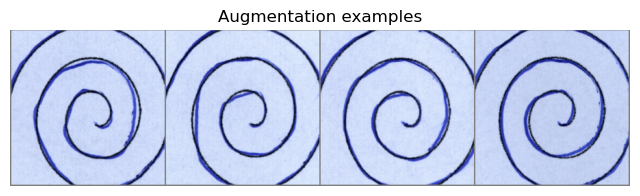

In [44]:
L.seed_everything(123)
NUM_IMAGES = 4
images = [train_dataset[idx][0] for idx in range(NUM_IMAGES)]
orig_images = [Image.open(train_dataset.samples[idx][0]) for idx in range(NUM_IMAGES)]
orig_images = [test_transform(img) for img in orig_images]

img_grid = torchvision.utils.make_grid(torch.stack(images, dim=0), nrow=4, normalize=True, pad_value=0.5)
img_grid = img_grid.permute(1, 2, 0)

plt.figure(figsize=(8, 8))
plt.title("Augmentation examples")
plt.imshow(img_grid)
plt.axis("off")
plt.show()
plt.close()

In [45]:
from torchvision.transforms import functional as F
import random
import numpy as np

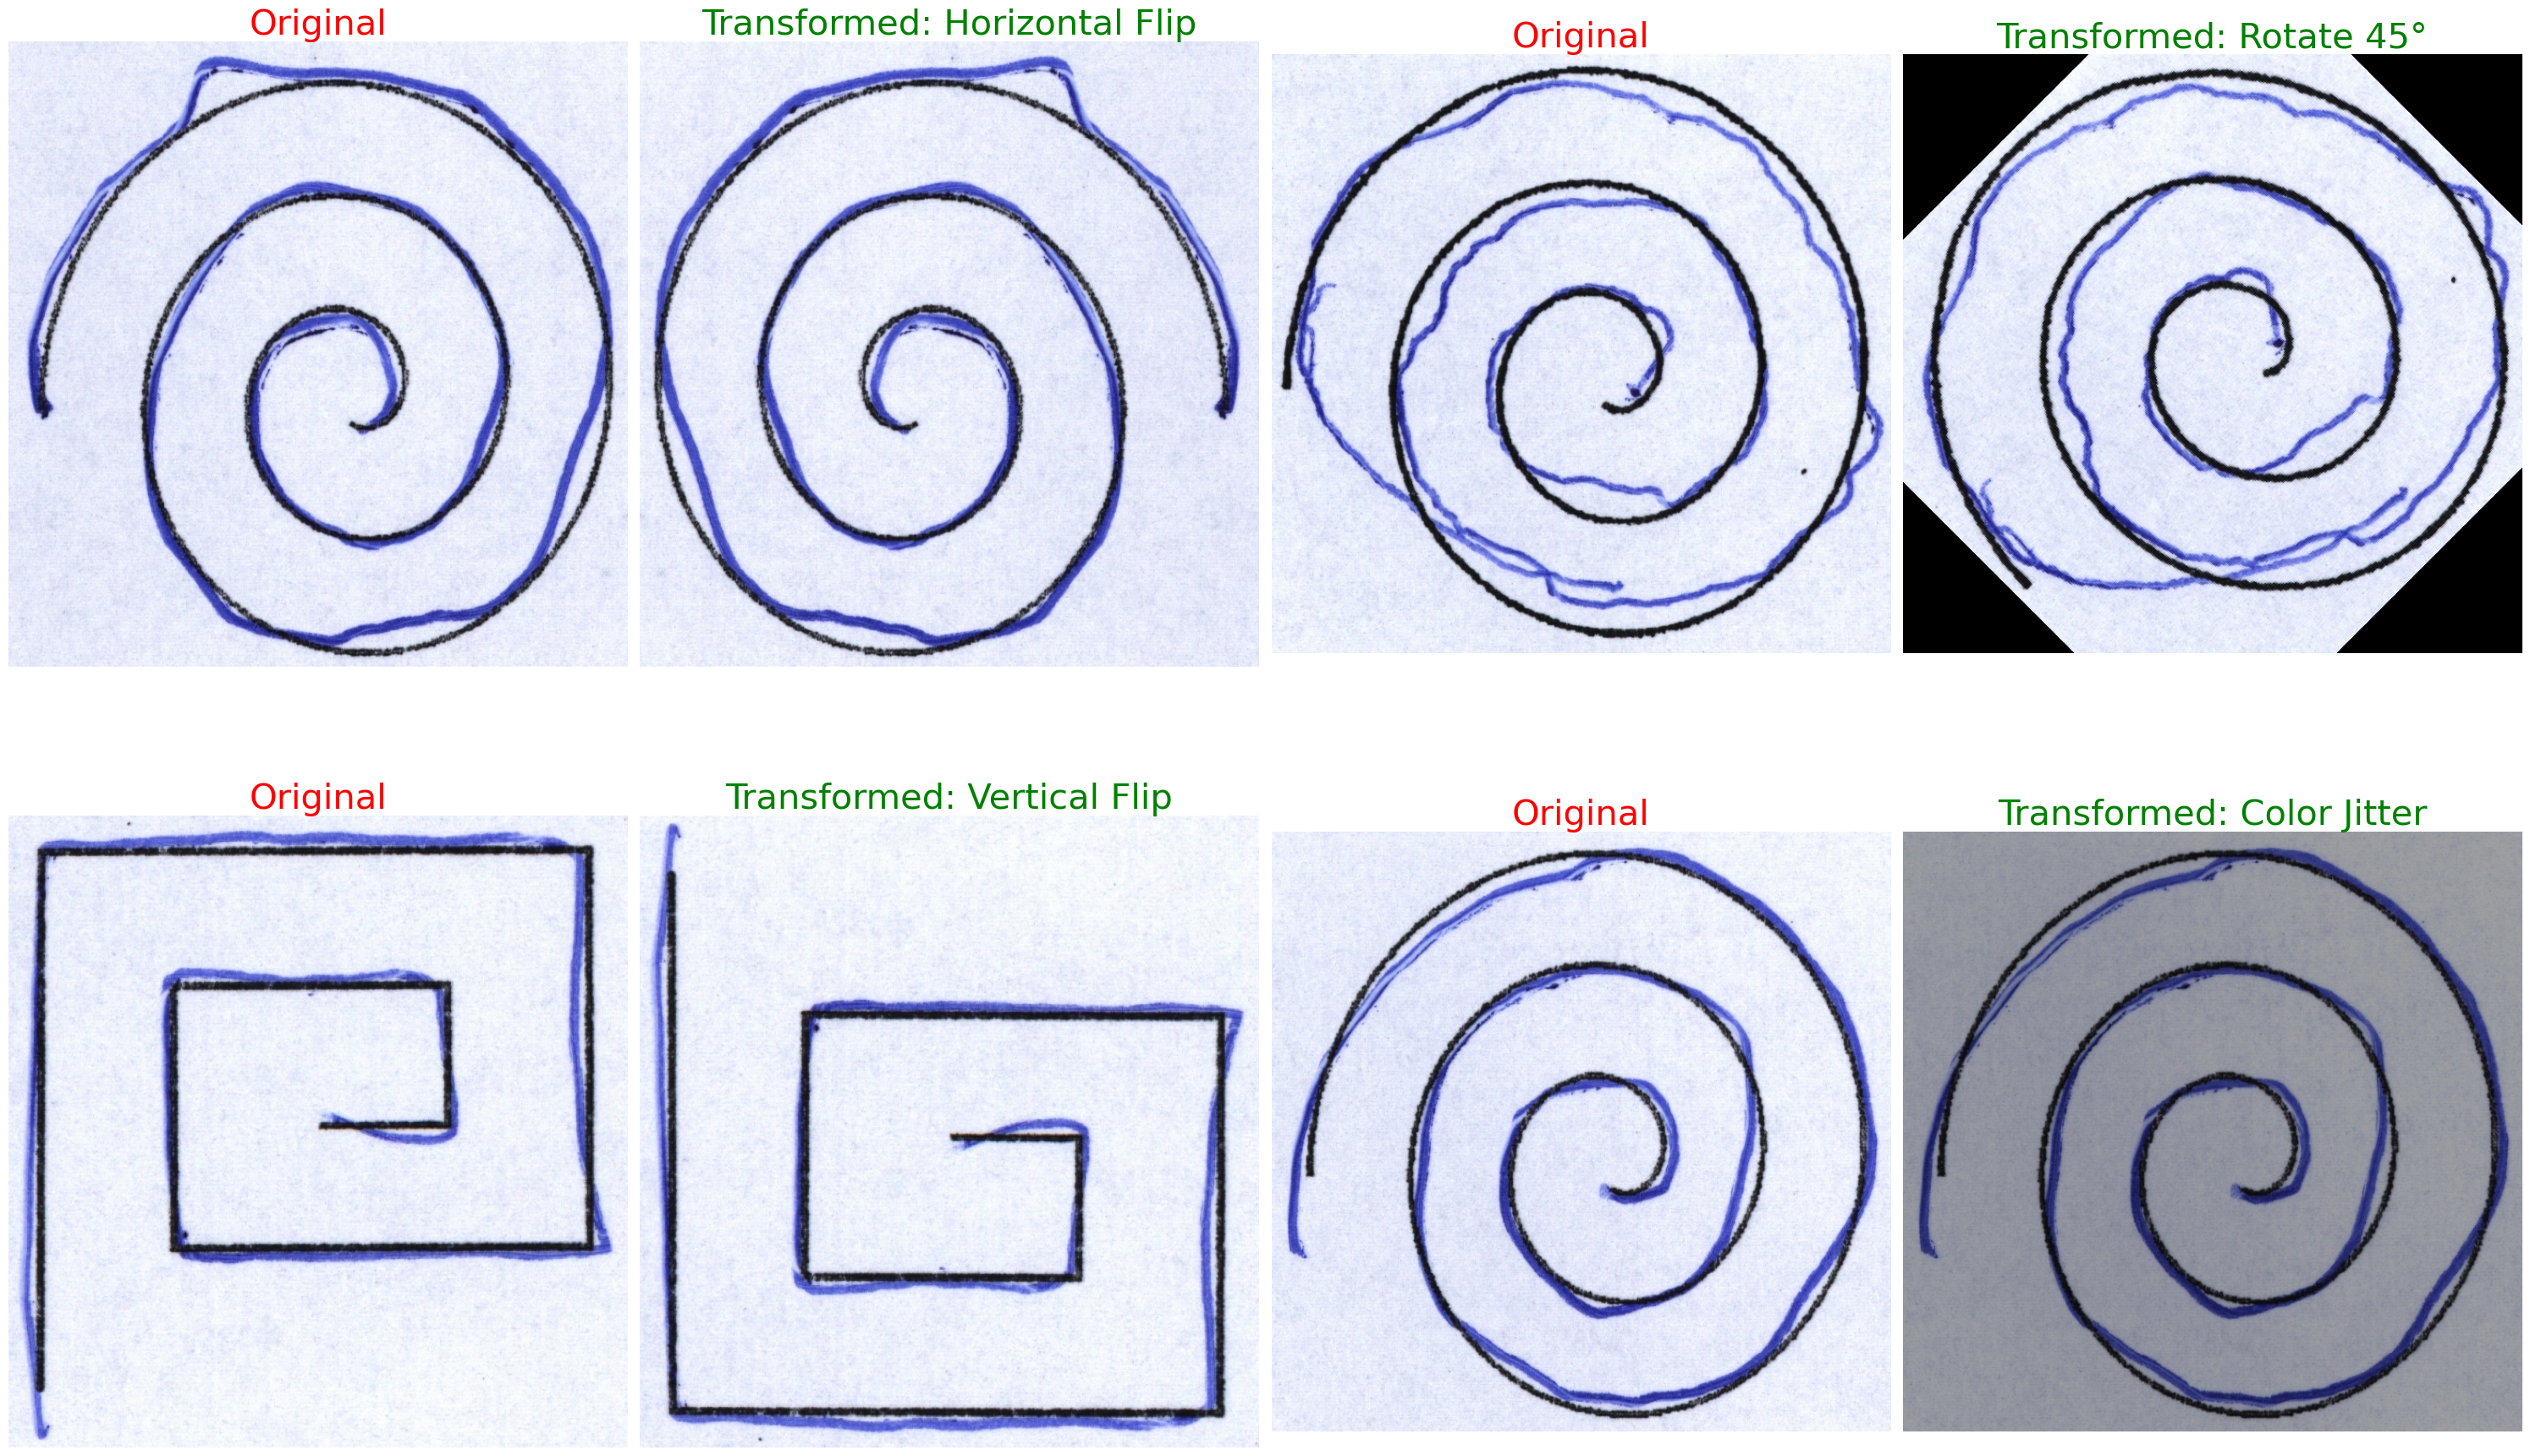

In [46]:

folder_path = "../data/CombinedAll/Healthy"


image_files = [f for f in os.listdir(folder_path) if f.endswith(('.jpg', '.png', '.jpeg'))]
selected_images = random.sample(image_files, 4)


transform_list = [
    ("Horizontal Flip", transforms.RandomHorizontalFlip(p=1.0)),
    ("Rotate 45°", transforms.RandomRotation(degrees=(45, 45))),
    ("Vertical Flip", transforms.RandomVerticalFlip(p=1.0)),
    ("Color Jitter", transforms.ColorJitter(brightness=0.5))
]


original_images = []
transformed_images = []
titles = []

for idx, img_file in enumerate(selected_images):
    img_path = os.path.join(folder_path, img_file)
    img = Image.open(img_path).convert('RGB')
    
    original_images.append(img)
    
    transform = transform_list[idx][1]
    transformed_img = transform(img)
    
    transformed_images.append(transformed_img)
    titles.append(transform_list[idx][0])

fig, axes = plt.subplots(2, 4, figsize=(30, 20))

for idx, img in enumerate(original_images):
    axes[idx//2, idx%2*2].imshow(img)
    axes[idx//2, idx%2*2].set_title('Original',fontsize=30, color='red')
    axes[idx//2, idx%2*2].axis('off')

for idx, (img, title) in enumerate(zip(transformed_images, titles)):
    axes[idx//2, idx%2*2 + 1].imshow(img)
    axes[idx//2, idx%2*2 + 1].set_title(f'Transformed: {title}', fontsize=30, color='green')
    axes[idx//2, idx%2*2 + 1].axis('off')

plt.tight_layout()
plt.show()

In [47]:
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=num_workers, persistent_workers=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, num_workers=num_workers, persistent_workers=True)


# ViT Model Prep

In [48]:
from torchvision.models import vit_b_16, ViT_B_16_Weights

In [49]:
L.seed_everything(123)

Seed set to 123


123

In [50]:
class VisionTransformerClassifier(L.LightningModule):
    def __init__(self, learning_rate=1e-3):
        super().__init__()
        self.vit = vit_b_16(weights=ViT_B_16_Weights.DEFAULT)
        
        for param in self.vit.parameters():
            param.requires_grad = False

        self.vit.heads = nn.Linear(in_features=768, out_features=1)
        
        self.learning_rate = learning_rate
        self.loss_fn = nn.BCEWithLogitsLoss()

    def forward(self, x):
        return self.vit(x)

    def training_step(self, batch, batch_idx):
        x, y = batch
        y = y.float()
        logits = self(x)
        loss = self.loss_fn(logits.squeeze(), y)
        preds = torch.sigmoid(logits.squeeze()) > 0.5
        acc = (preds == y).float().mean()        
        self.log(
            "train_loss", loss, on_step=True, on_epoch=True, prog_bar=True, logger=True
        )
        self.log(
            "train_acc", acc, on_step=True, on_epoch=True, prog_bar=True, logger=True
        )
        return loss
    
    def validation_step(self, batch, batch_idx):
        x, y = batch
        y = y.float()
        logits = self(x)
        preds = torch.sigmoid(logits.squeeze()) > 0.5
        acc = (preds == y).float().mean()
        loss = self.loss_fn(logits.squeeze(), y)
        self.log(
            "val_loss", loss, on_step=True, on_epoch=True, prog_bar=True, logger=True
        )
        self.log(
            "val_acc", acc, on_step=True, on_epoch=True, prog_bar=True, logger=True
        )

    def test_step(self, batch, batch_idx):
        x, y = batch
        y = y.float()
        logits = self(x)
        preds = torch.sigmoid(logits.squeeze()) > 0.5
        acc = (preds == y).float().mean()        
        loss = self.loss_fn(logits.squeeze(), y)
        self.log('test_loss', loss)
        self.log("test_acc", acc)

    def configure_optimizers(self):
        optimizer = torch.optim.Adam(self.parameters(), lr=self.learning_rate)
        scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(
            optimizer, T_max=10, eta_min=1e-6
        )

        return {
            "optimizer": optimizer,
            "lr_scheduler": {
                "scheduler": scheduler,
                "monitor": "val_loss",
            },            
        }

In [51]:
model = VisionTransformerClassifier(learning_rate=1e-3)

In [52]:
from torchinfo import summary

In [53]:
summary(model=model,
        input_size=(32, 3, 224, 224), # (batch_size, color_channels, height, width)
        # col_names=["input_size"], # uncomment for smaller output
        col_names=["input_size", "output_size", "num_params", "trainable"],
        col_width=20,
        row_settings=["var_names"]
)

Layer (type (var_name))                                           Input Shape          Output Shape         Param #              Trainable
VisionTransformerClassifier (VisionTransformerClassifier)         [32, 3, 224, 224]    [32, 1]              --                   Partial
├─VisionTransformer (vit)                                         [32, 3, 224, 224]    [32, 1]              768                  Partial
│    └─Conv2d (conv_proj)                                         [32, 3, 224, 224]    [32, 768, 14, 14]    (590,592)            False
│    └─Encoder (encoder)                                          [32, 197, 768]       [32, 197, 768]       151,296              False
│    │    └─Dropout (dropout)                                     [32, 197, 768]       [32, 197, 768]       --                   --
│    │    └─Sequential (layers)                                   [32, 197, 768]       [32, 197, 768]       (85,054,464)         False
│    │    └─LayerNorm (ln)                        

In [54]:
from lightning.pytorch.callbacks import ModelCheckpoint
from lightning.pytorch.loggers.tensorboard import TensorBoardLogger
from lightning.pytorch.callbacks.early_stopping import EarlyStopping

In [55]:
checkpoint_callback = ModelCheckpoint(
    dirpath="../models/checkpoints",
    monitor="val_loss",
    filename="vitb16-{epoch:02d}-{val_loss:.2f}-{val_acc:.2f}",
    save_top_k=3,
    mode="min",
)

logger = TensorBoardLogger(save_dir="../lightning_logs", name="vitb16", )

early_stopping = EarlyStopping(monitor="val_loss", patience=5, mode="min", verbose=False)

In [56]:
# Initialize the Trainer
trainer = L.Trainer(
   max_epochs=20,
   callbacks=[checkpoint_callback, early_stopping],
   logger=logger,
   accelerator="gpu" if torch.cuda.is_available() else "cpu",
   devices="auto",
   log_every_n_steps=1,
)


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


In [57]:
# Train the model
trainer.fit(model, train_loader, val_loader)

# Test the model
trainer.test(model, val_loader)

You are using a CUDA device ('NVIDIA GeForce RTX 4060 Laptop GPU') that has Tensor Cores. To properly utilize them, you should set `torch.set_float32_matmul_precision('medium' | 'high')` which will trade-off precision for performance. For more details, read https://pytorch.org/docs/stable/generated/torch.set_float32_matmul_precision.html#torch.set_float32_matmul_precision
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name    | Type              | Params | Mode 
------------------------------------------------------
0 | vit     | VisionTransformer | 85.8 M | train
1 | loss_fn | BCEWithLogitsLoss | 0      | train
------------------------------------------------------
769       Trainable params
85.8 M    Non-trainable params
85.8 M    Total params
343.198   Total estimated model params size (MB)
152       Modules in train mode
0         Modules in eval mode


Epoch 19: 100%|██████████| 13/13 [00:10<00:00,  1.29it/s, v_num=0, train_loss_step=0.231, train_acc_step=0.968, val_loss_step=0.377, val_acc_step=0.889, val_loss_epoch=0.340, val_acc_epoch=0.856, train_loss_epoch=0.314, train_acc_epoch=0.866]

`Trainer.fit` stopped: `max_epochs=20` reached.


Epoch 19: 100%|██████████| 13/13 [00:11<00:00,  1.16it/s, v_num=0, train_loss_step=0.231, train_acc_step=0.968, val_loss_step=0.377, val_acc_step=0.889, val_loss_epoch=0.340, val_acc_epoch=0.856, train_loss_epoch=0.314, train_acc_epoch=0.866]


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Testing DataLoader 0: 100%|██████████| 4/4 [00:01<00:00,  2.39it/s]
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        test_acc            0.8557214140892029
        test_loss           0.3400209844112396
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


[{'test_loss': 0.3400209844112396, 'test_acc': 0.8557214140892029}]

In [58]:
from tensorboard.backend.event_processing import event_accumulator
import pandas as pd

In [59]:
# Initialize event accumulator
ea = event_accumulator.EventAccumulator('../lightning_logs/vitb16/version_0') # Use your latest version
ea.Reload()
print("Available tags:", ea.Tags())

Available tags: {'images': [], 'audio': [], 'histograms': [], 'scalars': ['train_loss_step', 'train_acc_step', 'epoch', 'val_loss_step', 'val_acc_step', 'val_loss_epoch', 'val_acc_epoch', 'train_loss_epoch', 'train_acc_epoch', 'test_loss', 'test_acc'], 'distributions': [], 'tensors': [], 'graph': False, 'meta_graph': False, 'run_metadata': []}


In [63]:
train_loss = pd.DataFrame(ea.Scalars('train_loss_epoch'))
val_loss = pd.DataFrame(ea.Scalars('val_loss_epoch'))
train_acc = pd.DataFrame(ea.Scalars('train_acc_epoch'))
val_acc = pd.DataFrame(ea.Scalars('val_acc_epoch'))
epochs = pd.DataFrame(ea.Scalars('epoch'))
train_loss

wall_time  step     value
0   1.734609e+09    12  0.519885
1   1.734609e+09    25  0.429466
2   1.734609e+09    38  0.393999
3   1.734609e+09    51  0.374806
4   1.734609e+09    64  0.364919
5   1.734609e+09    77  0.355628
6   1.734609e+09    90  0.351027
7   1.734609e+09   103  0.346415
8   1.734609e+09   116  0.344744
9   1.734609e+09   129  0.344069
10  1.734609e+09   142  0.343836
11  1.734609e+09   155  0.343706
12  1.734609e+09   168  0.343172
13  1.734609e+09   181  0.342000
14  1.734609e+09   194  0.339866
15  1.734609e+09   207  0.335417
16  1.734609e+09   220  0.330757
17  1.734609e+09   233  0.325918
18  1.734609e+09   246  0.321226
19  1.734609e+09   259  0.314172

In [64]:
epochs

wall_time  step  value
0    1.734609e+09     0    0.0
1    1.734609e+09     1    0.0
2    1.734609e+09     2    0.0
3    1.734609e+09     3    0.0
4    1.734609e+09     4    0.0
..            ...   ...    ...
296  1.734609e+09   258   19.0
297  1.734609e+09   259   19.0
298  1.734609e+09   259   19.0
299  1.734609e+09   259   19.0
300  1.734609e+09   260   20.0

[301 rows x 3 columns]

In [76]:
total_train_samples = len(train_dataset)
batches_per_epoch = total_train_samples / batch_size
total_train_samples, batches_per_epoch

(799, 12.484375)

In [79]:
train_epochs = train_loss['step'] / batches_per_epoch
val_epochs = val_loss['step'] / batches_per_epoch
train_epochs, val_epochs

(0      0.961202
 1      2.002503
 2      3.043805
 3      4.085106
 4      5.126408
 5      6.167710
 6      7.209011
 7      8.250313
 8      9.291615
 9     10.332916
 10    11.374218
 11    12.415519
 12    13.456821
 13    14.498123
 14    15.539424
 15    16.580726
 16    17.622028
 17    18.663329
 18    19.704631
 19    20.745932
 Name: step, dtype: float64,
 0      0.961202
 1      2.002503
 2      3.043805
 3      4.085106
 4      5.126408
 5      6.167710
 6      7.209011
 7      8.250313
 8      9.291615
 9     10.332916
 10    11.374218
 11    12.415519
 12    13.456821
 13    14.498123
 14    15.539424
 15    16.580726
 16    17.622028
 17    18.663329
 18    19.704631
 19    20.745932
 Name: step, dtype: float64)

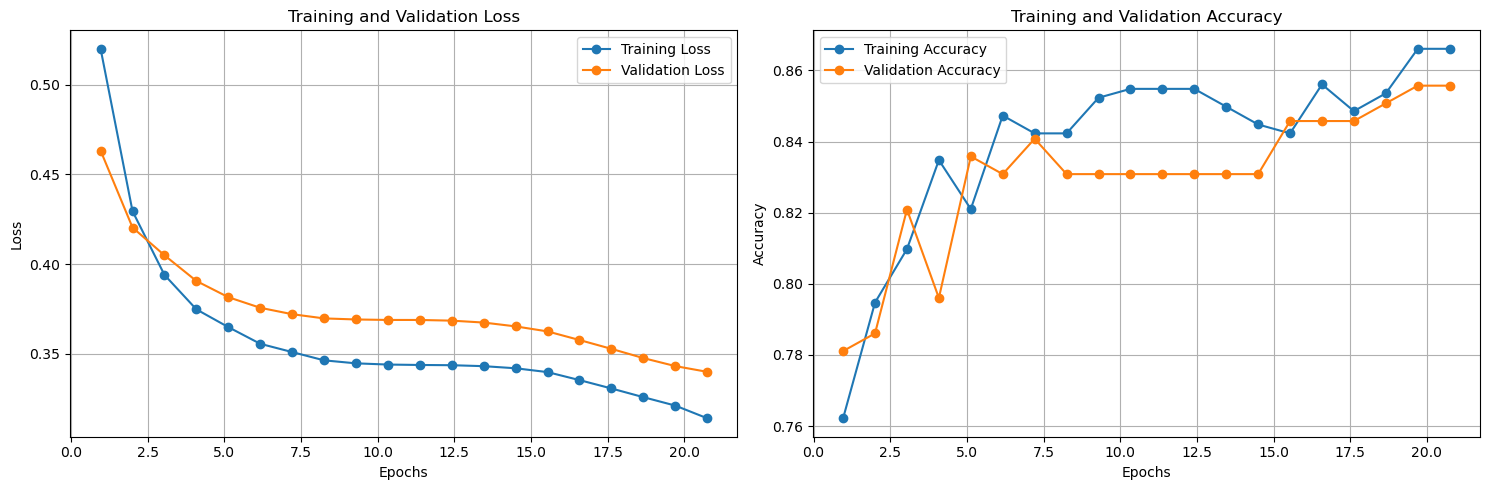

In [73]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

ax1.plot(train_epochs, train_loss['value'], label='Training Loss', marker='o')
ax1.plot(val_epochs, val_loss['value'], label='Validation Loss', marker='o')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.set_title('Training and Validation Loss')
ax1.legend()
ax1.grid(True)

ax2.plot(train_epochs, train_acc['value'], label='Training Accuracy', marker='o')
ax2.plot(val_epochs, val_acc['value'], label='Validation Accuracy', marker='o')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.set_title('Training and Validation Accuracy')
ax2.legend()
ax2.grid(True)

plt.tight_layout()
plt.show()